### Optimal Systems for Stock & Games

*Lorena Garcia Reyes*

This notebook includes all the code needed to generate files, graphs, simulations and exercises presented in the Optimal Systems for Stock and Games dissertation for the University of Edinburgh.


1. [General Setting](#packages)
2. [Chapter 3. Roulette](#ch_3)
3. [Chapter 4. Gambler’s ruin problem](#ch_4)
3. [Chapter 5. Betting systems](#ch_5)
4. [Chapter 6. Empirical analysis of betting systems](#ch_6)


#### 1. General setting <a id='packages'></a>

Libraries needed

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from csv import writer
from itertools import product

#General dictionary with the bet types, values and payoffs.
dic = {
'red': {'values': [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36], 'payoff': 1},
'black': {'values': [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35], 'payoff': 1},
'high': {'values': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'payoff': 1},
'low': {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'payoff': 1},
'dozen_1': {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] , 'payoff': 2},
'dozen_2': {'values': [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'payoff': 2},
'dozen_3': {'values': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'payoff': 2},
'zero': {'values': [0], 'payoff': 35},
'one': {'values': [1], 'payoff': 35},
'nine': {'values': [9], 'payoff': 35},
'six': {'values': [9,10,11,12,19,33], 'payoff': 5},
'square': {'values': [9,10,11,12], 'payoff': 8},
'street': {'values': [9,10,12], 'payoff': 11},
'split': {'values': [9,10], 'payoff': 17}}

#### Chapter 3. Roulette <a id='ch_3'></a> . 

Table 2: Smart Live Casino data summary. Page 16.

In [1599]:
data = pd.read_excel("roulette_data.xlsx")

#Generating a table with the frequencies and observed probability
frequency_table = data['outcome'].value_counts()
frequency = frequency_table.to_frame().reset_index()
frequency.columns = ['outcome', 'frequency']
frequency['outcome'] = frequency['outcome'].astype('category')

#Frequency table
frequency['probability'] = frequency['frequency']/len(data)

Smart Live Casino chi-Square test. Page 17.

In [ ]:
# Pearson's chi-squared test
expected_frequency = np.ones(37)*150
chi2, p_value = chisquare(frequency.frequency, expected_frequency)

# Print the test results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

#### Chapter 4. Gambler’s ruin problem <a id='ch_4'></a>

Figure 5: Ruin probability simulation. Page 21

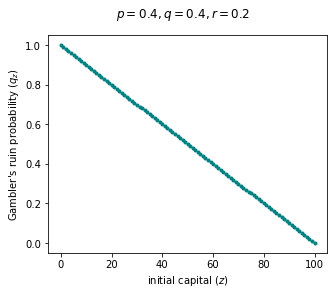

In [1596]:
# Example with p = q
p = 0.4
q= 0.4
r= 0.2
probabilities = [0.4, 0.4, 0.2]
z = 20 #Initial capital of the gambler
N = 100 #Total capital in the system
p = np.zeros(101)

for i in range(101):
    p[i]= 1- i/N


plt.figure(figsize=(5, 4))
plt.suptitle('$p = 0.4, q = 0.4, r = 0.2$')
plt.plot(range(101), p,  marker='.', linestyle='', color = 'teal')

plt.xlabel("initial capital $(z)$")
plt.ylabel("Gambler's ruin probability $(q_{z})$")
plt.show()

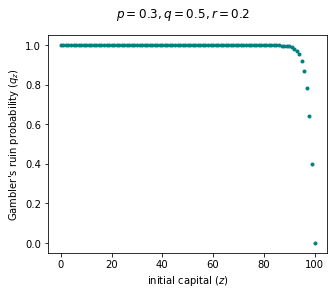

In [1597]:
# Example with p != q
p = 0.3
q= 0.5
r= 0.2
N =100 
proba = np.zeros(101)
proba[0] = 1

for i in range(99):
    proba[i+1] = ((q/p)**(N)- (q/p)**(i+1))/((q/p)**(N)-1)

plt.figure(figsize=(5, 4))
plt.suptitle('$p = 0.3, q = 0.5, r = 0.2$')
plt.plot(range(101), proba,  marker='.', linestyle='', color = 'teal')
ax.set_ylim(0,1)

plt.xlabel("initial capital $(z)$")
plt.ylabel("Gambler's ruin probability $(q_{z})$")
plt.show()    


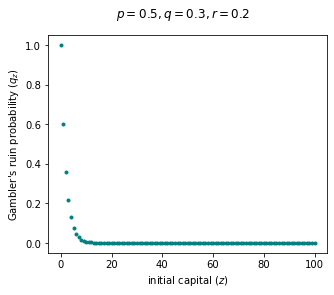

In [1598]:
# Example with p != q
p = 0.5
q= 0.3
r= 0.2
N =100 
proba = np.zeros(101)
proba[0] = 1

for i in range(99):
    proba[i+1] = ((q/p)**(N)- (q/p)**(i+1))/((q/p)**(N)-1)

plt.figure(figsize=(5, 4))
plt.suptitle('$p = 0.5, q = 0.3, r = 0.2$')
plt.plot(range(101), proba,  marker='.', linestyle='', color = 'teal')
ax.set_ylim(0,1)

plt.xlabel("initial capital $(z)$")
plt.ylabel("Gambler's ruin probability $(q_{z})$")
plt.show()    


Figure 6: Gambler’s ruin simulation. Page 23.

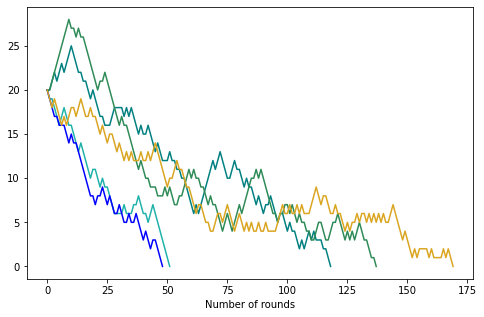

In [1606]:
#Variables
probabilities = [0.3, 0.5, 0.2]
z = 20 #Initial capital of the gambler
N = 100 #Total capital in the system

def path_generator(z, N, probabilities):
    games = [z];
    while games[-1] != 0 and games[-1] != N:
        outcome  = int(np.random.choice([1, -1, 0], size=1, p=probabilities))
        games.append(games[-1] + outcome)
    return games

# Define the color map
cmap = plt.get_cmap('tab20')

plt.figure(figsize=(8, 5))

games = path_generator(z, N, probabilities)
plt.plot(list(range(len(games))), games, color= 'lightseagreen')

games = path_generator(z, N, probabilities)
plt.plot(list(range(len(games))), games, color= 'teal')

games = path_generator(z, N, probabilities)
plt.plot(list(range(len(games))), games, color= 'seagreen')

games = path_generator(z, N, probabilities)
plt.plot(list(range(len(games))), games, color= 'blue')

games = path_generator(z, N, probabilities)
plt.plot(list(range(len(games))), games, color= 'goldenrod')

# Set labels and title
plt.xlabel('Number of rounds')

# Display the plots
plt.show()

Figure 7: Expected duration of the game as a function of r. Page 25.

/var/folders/kf/nm4wtprd6sggvc1gpz3wr6dw0000gn/T/ipykernel_62667/1838472892.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  expected_duration = (z * (N - z)) / (1 - r)


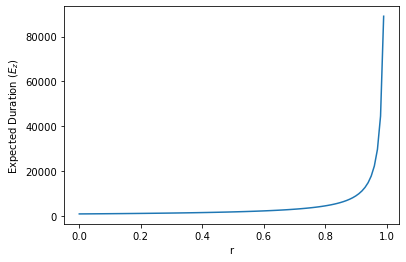

In [ ]:
# Define the parameters
N = 100  # Total capital
z = 10   # Initial capital

# Varying values of r
r_values = np.linspace(0, 1, 100)

# Calculate expected duration for each r value
expected_durations = []
for r in r_values:
    q  = (1 - r) / 2
    p = 1- r -q
    if p != q:
        expected_duration = (z / (q - p)) - (N / (q - p)) * ((1 - (q / p) ** z) / (1 - (q / p) ** N))
    else:
        expected_duration = (z * (N - z)) / (1 - r)
    expected_durations.append(expected_duration)

# Create the plot

plt.plot(r_values, expected_durations, label='Expected Duration')
plt.xlabel('r')
plt.ylabel('Expected Duration $(E_{z})$')

plt.show()


Figure 8: Expected duration of the game simulation. Page 26.

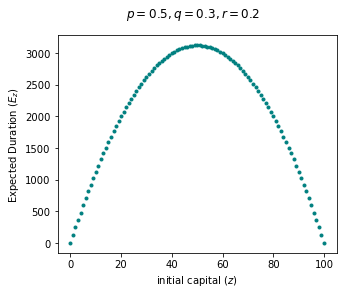

In [1607]:
# Define the parameters
N = 100  # Total capital   # Initial capital
r = 0.2
q  =0.4
p = 1- r -q

z_values = np.linspace(0, 100, 101)

# Calculate expected duration for each r value
expected_durations = []
for z in z_values:
    if p != q:
        expected_duration = (z / (q - p)) - (N / (q - p)) * ((1 - (q / p) ** z) / (1 - (q / p) ** N))
    else:
        expected_duration = (z * (N - z)) / (1 - r)
    expected_durations.append(expected_duration)

# Create the plot
plt.figure(figsize=(5, 4))
plt.suptitle('$p = 0.5, q = 0.3, r = 0.2$')
plt.plot(z_values, expected_durations, label='Expected Duration', marker='.', linestyle='', color = 'teal')
plt.xlabel('r')
plt.ylabel('Expected Duration $(E_{z})$')
#plt.set_xlim(0,100)
plt.xlabel("initial capital $(z)$")

plt.show()


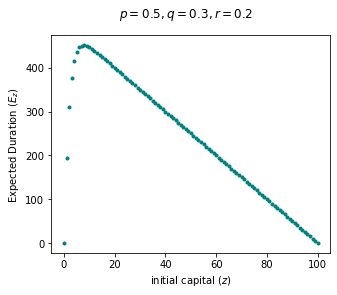

In [1608]:
# Define the parameters
N = 100  # Total capital   # Initial capital
r = 0.2
q  =0.3
p = 1- r -q

z_values = np.linspace(0, 100, 101)

# Calculate expected duration for each r value
expected_durations = []
for z in z_values:
    if p != q:
        expected_duration = (z / (q - p)) - (N / (q - p)) * ((1 - (q / p) ** z) / (1 - (q / p) ** N))
    else:
        expected_duration = (z * (N - z)) / (1 - r)
    expected_durations.append(expected_duration)

# Create the plot
plt.figure(figsize=(5, 4))
plt.suptitle('$p = 0.5, q = 0.3, r = 0.2$')
plt.plot(z_values, expected_durations, label='Expected Duration', marker='.', linestyle='', color = 'teal')
plt.xlabel('r')
plt.ylabel('Expected Duration $(E_{z})$')
#plt.set_xlim(0,100)
plt.xlabel("initial capital $(z)$")

plt.show()


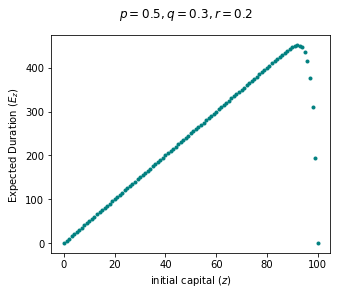

In [1609]:
# Define the parameters
N = 100  # Total capital   # Initial capital
r = 0.2
q  =0.5
p = 1- r -q

z_values = np.linspace(0, 100, 101)

# Calculate expected duration for each r value
expected_durations = []
for z in z_values:
    if p != q:
        expected_duration = (z / (q - p)) - (N / (q - p)) * ((1 - (q / p) ** z) / (1 - (q / p) ** N))
    else:
        expected_duration = (z * (N - z)) / (1 - r)
    expected_durations.append(expected_duration)

# Create the plot
plt.figure(figsize=(5, 4))
plt.suptitle('$p = 0.5, q = 0.3, r = 0.2$')
plt.plot(z_values, expected_durations, label='Expected Duration', marker='.', linestyle='', color = 'teal')
plt.xlabel('r')
plt.ylabel('Expected Duration $(E_{z})$')
#plt.set_xlim(0,100)
plt.xlabel("initial capital $(z)$")

plt.show()


Table: Estimation for ruin probability and game duration under different payoff  bets when
doubling an initial capital of 50 and betting 1 unit at a time. Page 28

In [ ]:
#To generate the information presented in the table it is needed to run the code below for 
# bet_type = 'nine', 'split', 'street', 'square', 'six', 'dozen_1' and 'red'. After generating the files,
# the average rounds and ruin probability can be calculated.
bet_type = 'dozen_1'
data_frame = pd.DataFrame(columns=['target', 'id','ruin', 'rounds'])
file_name = 'Doubling_1_dozen.csv'
data_frame.to_csv(file_name, index=False)

for i in range(100000):
    target = 100
    ruin = 0
    S_i=[50]
    bet_amount = 1
    flag = 0
    k = 0
    loss = 0
        
    while flag == 0:
        if np.random.randint(0, 37) in dic[bet_type]['values']:
            S_i.append(S_i[-1]+ dic[bet_type]['payoff'])
            k +=1
        
        else:
            S_i.append(S_i[-1]-bet_amount)
            k +=1

        if S_i[-1] >= target:
            flag = 1
                
        if S_i[-1] < bet_amount:
            ruin = 1
            flag = 1
        
    List = [G_z, i,ruin, k]
    with open(file_name, 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(List)
        f_object.close()

Figure 10, 11: Number of rounds distribution comparison. Pages 28, 29 and 31

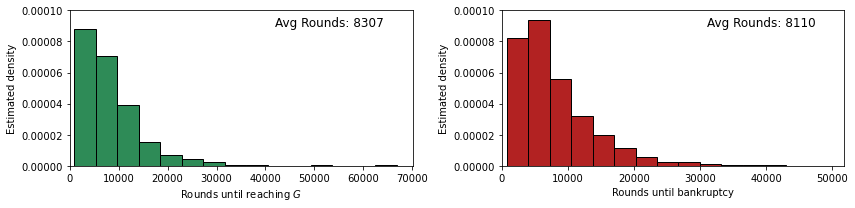

In [ ]:
file_name= 'Doubling_1_m_six.csv'
outcomes = pd.read_csv(file_name)
ruined = outcomes[outcomes['ruin'] ==1 ]
success = outcomes[outcomes['ruin'] ==0 ]
limit  =0.00010

avg_rounds_success = success['rounds'].mean()
avg_rounds_ruined = ruined['rounds'].mean()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Create histograms for each subplot
n1, bins1, patches1 = axes[0].hist(success['rounds'], bins=15, edgecolor='black', density=True, color = 'seagreen')
n2, bins2, patches2 = axes[1].hist(ruined['rounds'], bins=15, edgecolor='black', density=True, color = 'firebrick')

# Add labels and title for each subplot
axes[0].set_xlabel('Rounds until reaching $G$')
axes[0].set_ylabel('Estimated density')
axes[0].set_xlim(0)
axes[0].set_ylim(0, limit)
axes[0].annotate(f'Avg Rounds: {avg_rounds_success:.0f}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=12)

axes[1].set_xlim(0)
axes[1].set_ylim(0, limit)
axes[1].set_xlabel('Rounds until bankruptcy')
axes[1].set_ylabel('Estimated density')
axes[1].annotate(f'Avg Rounds: {avg_rounds_ruined:.0f}', xy=(0.6, 0.9), xycoords='axes fraction', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

Table 5: Estimation for ruin probability and game duration under different payoff bets when
doubling an initial capital of 50 and betting 1/m unit at a time. Page 30

In [ ]:
bet_type = 'split'
data_frame = pd.DataFrame(columns=['target', 'id','ruin', 'rounds'])
file_name = 'Doubling_1_m_split.csv'
data_frame.to_csv(file_name, index=False)


for i in range(100000):
    target = 100
    ruin = 0
    S_i=[50]
    bet_amount = 1/dic[bet_type]['payoff']
    flag = 0
    k = 0
    loss = 0
        
    while flag == 0:
        if np.random.randint(0, 37) in dic[bet_type]['values']:
            S_i.append(S_i[-1]+ 1)
            k +=1
        
        else:
            S_i.append(S_i[-1]-bet_amount)
            k +=1

        if S_i[-1] >= target:
            flag = 1
                
        if S_i[-1] < bet_amount:
            ruin = 1
            flag = 1
        
    List = [G_z, i,ruin, k]
    with open(file_name, 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(List)
        f_object.close()

#### Chapter 5. Betting systems <a id='ch_5'></a>

Figure 12: Flat betting system simulation. Page 34

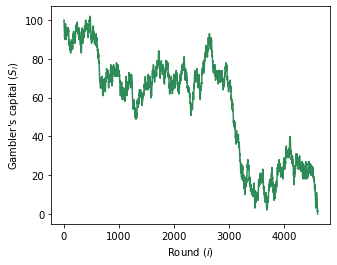

In [ ]:
bet_type = 'red'
target = 200
ruin = 0
S_i=[100]
bet_amount = 1
flag = 0
k = 0
loss = 0
        
while flag == 0:
    if np.random.randint(0, 37) in dic[bet_type]['values']:
        S_i.append(S_i[-1]+ dic[bet_type]['payoff'])
        k +=1
        
    else:
        S_i.append(S_i[-1]-bet_amount)
        k +=1

    if S_i[-1] >= target:
        flag = 1
                
    if S_i[-1] < bet_amount:
        ruin = 1
        flag = 1

rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots(figsize=(5, 4))

plt.plot(rounds, S_i, color= 'seagreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 13: Proportional betting system simulation. Page 36

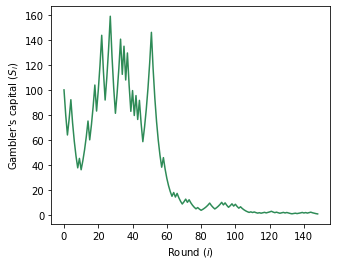

In [ ]:
bet_type = 'red'
l = 0.2
target = 200
ruin = 0
S_i=[100]
bet_amount = l*S_i[-1]
flag = 0
k = 0
loss = 0
        
while flag == 0:
    if np.random.randint(0, 37) in dic[bet_type]['values']:
        S_i.append(S_i[-1]+ bet_amount*dic[bet_type]['payoff'])
        k +=1
        
    else:
        S_i.append(S_i[-1]-bet_amount)
        k +=1

    bet_amount = l*S_i[-1]
    if S_i[-1] >= target:
        flag = 1
                
    if S_i[-1] < 1:
        ruin = 1
        flag = 1

rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots(figsize=(5, 4))

plt.plot(rounds, S_i, color= 'seagreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 14: Martingale betting system simulation. Page 37

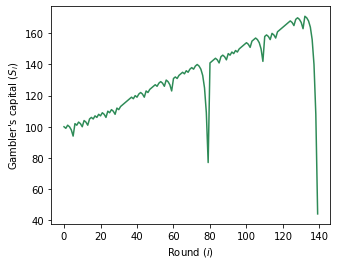

In [ ]:
bet_type = 'red'
bet_amount = 1/dic[bet_type]['payoff']
target = 200
ruin = 0
S_i=[100]
flag = 0
k = 0
loss = 0
        
while flag == 0:
    if np.random.randint(0, 37) in dic[bet_type]['values']:
        S_i.append(S_i[-1]+ bet_amount*dic[bet_type]['payoff'])
        k +=1
        loss = 0
        bet_amount = 1/dic[bet_type]['payoff']
    
    else:
        S_i.append(S_i[-1]-bet_amount)
        k +=1
        loss += bet_amount
        bet_amount = (loss + 1)/dic[bet_type]['payoff']

    
    if S_i[-1] >= target:
        flag = 1
                
    if S_i[-1] < bet_amount:
        ruin = 1
        flag = 1

rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots(figsize=(5, 4))

plt.plot(rounds, S_i, color= 'seagreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 16: Risk adaptable betting system simulation. Page 38

high, 59.56280339478211
high, 56.584663225043
high, 53.755430063790854
high, 51.06765856060131
high, 48.51427563257124
high, 46.08856185094268


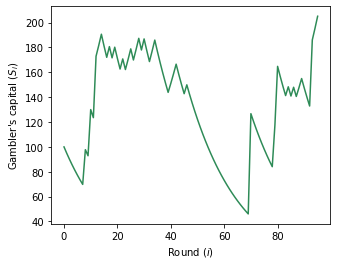

In [ ]:
l = 0.05
bet_type = 'nine'
S_i=[100]
bet_amount = l*S_i[-1]
target = 200
ruin = 0

flag = 0
k = 0
loss = 0
        
while flag == 0:
    if np.random.randint(0, 37) in dic[bet_type]['values']:
        S_i.append(S_i[-1]+ bet_amount*dic[bet_type]['payoff'])
        k +=1
    
    else:
        S_i.append(S_i[-1]-bet_amount)
        k +=1
    
    bet_amount = l * S_i[-1]
    
    if target*0.7 > S_i[-1] > target*0.3:
        bet_type = 'square'
        
    elif target*0.7 <= S_i[-1]:
        bet_type = 'red'
        
    else:
         bet_type = 'nine'
         print(f'high, {S_i[-1]}')
    
    if S_i[-1] >= target:
        flag = 1
                
    if S_i[-1] < 0.1:
        ruin = 1
        flag = 1

rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots(figsize=(5, 4))

plt.plot(rounds, S_i, color= 'seagreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

#### Chapter 6. Empirical analysis of betting systems <a id='ch_6'></a>

Figure 17: Smart Live Casino - Example 1: Flat Betting System. Page 41

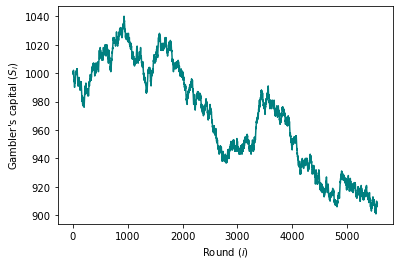

In [ ]:
betting_on= red
bet_amount = 1
i = 0 #index indicating the spin number
S_i=[1000] #initial capital


while S_i[-1]>= bet_amount and i< len(data.outcome):
    if data.outcome[i] in betting_on['values']:
        S_i.append(S_i[-1] + bet_amount * betting_on['payoff'])
    else:
        S_i.append(S_i[-1]- bet_amount)
    i +=1
    
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots()
plt.plot(rounds, S_i, color= 'teal')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 18: Smart Live Casino - Example 2: Flat Betting System. Page 42

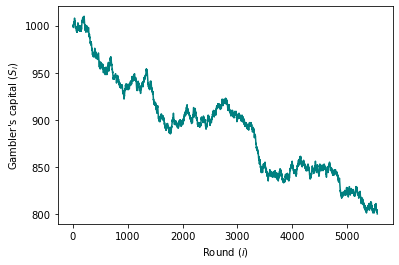

In [1616]:
betting_on= black
bet_amount = 1
i = 0 #index indicating the spin number
S_i=[1000] #initial capital


while S_i[-1]>= bet_amount and i< len(data.outcome):
    if data.outcome[i] in betting_on['values']:
        S_i.append(S_i[-1] + bet_amount * betting_on['payoff'])
    else:
        S_i.append(S_i[-1]- bet_amount)
    i +=1
    
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots()
plt.plot(rounds, S_i, color= 'teal')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 19: Smart Live Casino - Example 3: Flat Betting System. Page 42

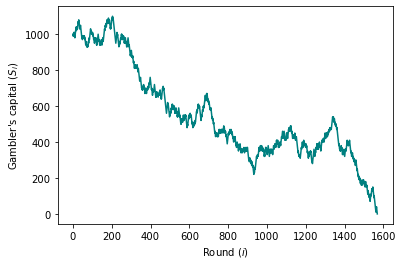

In [1617]:
betting_on= black
bet_amount = 10
i = 0 #index indicating the spin number
S_i=[1000] #initial capital


while S_i[-1]>= bet_amount and i< len(data.outcome):
    if data.outcome[i] in betting_on['values']:
        S_i.append(S_i[-1] + bet_amount * betting_on['payoff'])
    else:
        S_i.append(S_i[-1]- bet_amount)
    i +=1
    
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots()
plt.plot(rounds, S_i, color= 'teal')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 20: Smart Live Casino - Example 4: Proportional Betting System. Page 43

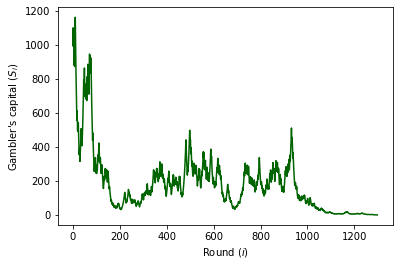

In [ ]:
betting_on= red
l = 0.1
i = 0 #index indicating the spin number
S_i=[1000] #initial capital
bet_amount = l*S_i[-1]


while S_i[-1]>= bet_amount and i< len(data.outcome) and bet_amount>0.1:
    if data.outcome[i] in betting_on['values']:
        S_i.append(S_i[-1] + bet_amount * betting_on['payoff'])
        bet_amount = l*S_i[-1]
    
    else:
        S_i.append(S_i[-1]- bet_amount)
        bet_amount = l*S_i[-1]
    i +=1
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(rounds, S_i, color= 'darkgreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 21: Smart Live Casino - Example 5: Proportional Betting System. Page 43

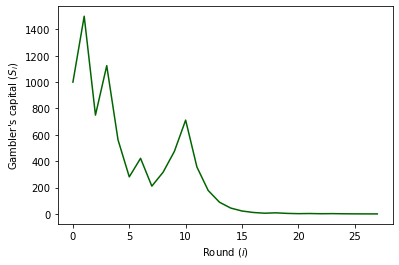

In [1618]:
betting_on= red
l = 0.5
i = 0 #index indicating the spin number
S_i=[1000] #initial capital
bet_amount = l*S_i[-1]


while S_i[-1]>= bet_amount and i< len(data.outcome) and bet_amount>0.1:
    if data.outcome[i] in betting_on['values']:
        S_i.append(S_i[-1] + bet_amount * betting_on['payoff'])
        bet_amount = l*S_i[-1]
    
    else:
        S_i.append(S_i[-1]- bet_amount)
        bet_amount = l*S_i[-1]
    i +=1
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(rounds, S_i, color= 'darkgreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.show()

Figure 22: Smart Live Casino - Example 6: Martingale Betting System. Page 43

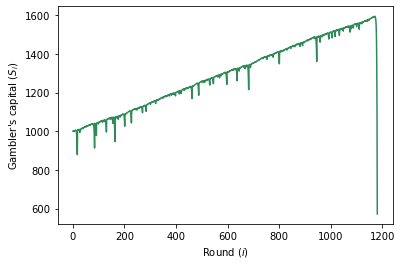

In [1619]:
betting_on=red
bet_amount = 1/betting_on['payoff'] #initial bet amount
i = 0 #index indicating the spin number
S_i=[1000] #initial capital
loss = 0


while S_i[-1]>= bet_amount and i< len(data.outcome):
    if data.outcome[i] in betting_on['values']:
        S_i.append(S_i[-1] + bet_amount * betting_on['payoff'])
        loss= 0
        bet_amount = 1/betting_on['payoff']
    else:
        S_i.append(S_i[-1]- bet_amount)
        loss += bet_amount
        bet_amount = (loss + 1)/betting_on['payoff']
    i +=1
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots()
plt.plot(rounds, S_i, color= 'seagreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
plt.show()

Figure 23: Smart Live Casino - Example 7: Martingale Betting System. Page 44

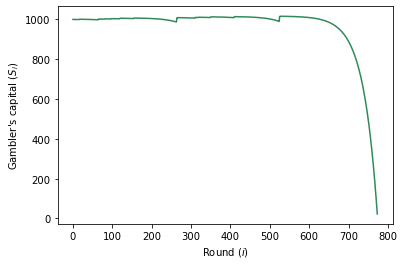

In [ ]:
betting_on=zero
bet_amount = 1/betting_on['payoff'] #initial bet amount
i = 0 #index indicating the spin number
S_i=[1000] #initial capital
loss = 0

while S_i[-1]>= bet_amount and i< len(data.outcome):
    if data.outcome[i] in betting_on['values']:
        S_i.append(S_i[-1] + bet_amount * betting_on['payoff'])
        loss= 0
        bet_amount = 1/betting_on['payoff']
    else:
        S_i.append(S_i[-1]- bet_amount)
        loss += bet_amount
        bet_amount = (loss + 1)/betting_on['payoff']
    i +=1
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots()
plt.plot(rounds, S_i, color= 'seagreen')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
plt.show()

Table 6: Probability of reaching the goal - Winning 1-unit of capital at a time exercise. Page 45 and
Table 7: Average number of rounds until reaching the goal- Winning 1-unit of capital at a time
exercise. Page 46

In [ ]:
bet_type = 'nine'
data_frame = pd.DataFrame(columns=['target','id','ruin', 'rounds'])
file_name = 'strategy_1.csv'
data_frame.to_csv(file_name, index=False)

for G_z in np.arange(1, 10, 1):
    for i in range(10000):
        target = 10 +G_z*10
        ruin = 0
        S_i=[100]
        bet_amount = 1/dic[bet_type]['payoff']
        flag = 0
        k = 0
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                k +=1
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                k +=1

            if S_i[-1] >= target:
                flag = 1
                
            if S_i[-1] < bet_amount:
                ruin = 1
                flag = 1
        
        List = [G_z,i,ruin, k]
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()

bet_type = 'dozen_1'
data_frame = pd.DataFrame(columns=['target','id','ruin', 'rounds'])
file_name = 'strategy_2.csv'
data_frame.to_csv(file_name, index=False)

for G_z in np.arange(1, 10, 1):
    for i in range(10000):
        target = 10 +G_z*10
        ruin = 0
        S_i=[100]
        bet_amount = 1/dic[bet_type]['payoff']
        flag = 0
        k = 0
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                k +=1
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                k +=1

            if S_i[-1] >= target:
                flag = 1
                
            if S_i[-1] < bet_amount:
                ruin = 1
                flag = 1
        
        List = [G_z,i,ruin, k]
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()

bet_type = 'red'
data_frame = pd.DataFrame(columns=['target','id','ruin', 'rounds'])
file_name = 'strategy_3.csv'
data_frame.to_csv(file_name, index=False)

for G_z in np.arange(1, 10, 1):
    for i in range(10000):
        target = 10 +G_z*10
        ruin = 0
        S_i=[100]
        bet_amount = 1/dic[bet_type]['payoff']
        flag = 0
        k = 0
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                k +=1
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                k +=1

            if S_i[-1] >= target:
                flag = 1
                
            if S_i[-1] < bet_amount:
                ruin = 1
                flag = 1
        
        List = [G_z,i,ruin, k]
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()

In [ ]:
bet_type = 'nine'
data_frame = pd.DataFrame(columns=['target', 'id','ruin', 'rounds'])
file_name = 'strategy_4.csv'
data_frame.to_csv(file_name, index=False)

for G_z in np.arange(1, 10, 1):
    
    for i in range(10000):
        target = 100 +G_z*100
        ruin = 0
        S_i=[100]
        bet_amount = 1/dic[bet_type]['payoff']
        flag = 0
        k = 0
        loss = 0
        
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                bet_amount = 1/dic[bet_type]['payoff']
                loss = 0
                k +=1
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                loss += bet_amount
                bet_amount = (loss + 1)/dic[bet_type]['payoff']
                k +=1

            if S_i[-1] >= target:
                flag = 1
                
            if S_i[-1] < bet_amount:
                ruin = 1
                flag = 1
        
        List = [G_z, i,ruin, k]
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()
            
bet_type = 'dozen_1'
data_frame = pd.DataFrame(columns=['target', 'id','ruin', 'rounds'])
file_name = 'strategy_5.csv'
data_frame.to_csv(file_name, index=False)

for G_z in np.arange(1, 10, 1):
    
    for i in range(10000):
        target = 100 +G_z*100
        ruin = 0
        S_i=[100]
        bet_amount = 1/dic[bet_type]['payoff']
        flag = 0
        k = 0
        loss = 0
        
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                bet_amount = 1/dic[bet_type]['payoff']
                loss = 0
                k +=1
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                loss += bet_amount
                bet_amount = (loss + 1)/dic[bet_type]['payoff']
                k +=1

            if S_i[-1] >= target:
                flag = 1
                
            if S_i[-1] < bet_amount:
                ruin = 1
                flag = 1
        
        List = [G_z, i,ruin, k]
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()
            

bet_type = 'red'
data_frame = pd.DataFrame(columns=['target', 'id','ruin', 'rounds'])
file_name = 'strategy_6.csv'
data_frame.to_csv(file_name, index=False)

for G_z in np.arange(1, 10, 1):
    
    for i in range(10000):
        target = 100 +G_z*100
        ruin = 0
        S_i=[100]
        bet_amount = 1/dic[bet_type]['payoff']
        flag = 0
        k = 0
        loss = 0
        
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                bet_amount = 1/dic[bet_type]['payoff']
                loss = 0
                k +=1
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                loss += bet_amount
                bet_amount = (loss + 1)/dic[bet_type]['payoff']
                k +=1

            if S_i[-1] >= target:
                flag = 1
                
            if S_i[-1] < bet_amount:
                ruin = 1
                flag = 1
        
        List = [G_z, i,ruin, k]
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()

Figure 24: Estimated probability of reaching G. Page 47

In [ ]:
#Function for single risk strategy
def simulate_game(l, G_z, bet_type, dic, iterations=10000):
    target = 100 +G_z*100
    data_frame = pd.DataFrame(columns=['id','k', 'ruin', 'capital_vector'])
    file_name = f'sim_red_{l}_{G_z}.csv'
    data_frame.to_csv(file_name, index=False)
   
    for j in range(iterations):
        ruin = 0
        S_i=[100]
        bet_amount = l * S_i[-1]
        flag = 0
        k = 0
        List = [j, k, ruin, S_i[-1]]
        
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()
            
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                k +=1
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                k +=1
            
            bet_amount = l * S_i[-1]

            if S_i[-1] >= target:
                flag = 1
                
            if S_i[-1] < 0.001:
                ruin = 1
                flag = 1
        
            List = [j, k, ruin, S_i[-1]]
            with open(file_name, 'a') as f_object:
                writer_object = writer(f_object)
                writer_object.writerow(List)
                f_object.close()
    return

In [ ]:
#Function for mixed risk strategy
def simulate_game_mixed(l, G_z, dic, iterations=1000):
    target = 100 +G_z*100
    data_frame = pd.DataFrame(columns=['id','k', 'long', 'ruin', 'capital_vector'])
    file_name = f'sim_mixed_{l}_{G_z}.csv'
    data_frame.to_csv(file_name, index=False)
    
    for j in range(iterations):
        long_path = 0
        ruin = 0
        S_i=[100]
        bet_amount = l * S_i[-1]
        flag = 0
        k = [0]
        bet_type = 'nine'
        List = [j, k[-1], long_path, ruin, S_i[-1]]
        
        with open(file_name, 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()
            
        while flag == 0:
            if np.random.randint(0, 37) in dic[bet_type]['values']:
                S_i.append(S_i[-1]+ bet_amount * dic[bet_type]['payoff'])
                k.append(k[-1]+1)
        
            else:
                S_i.append(S_i[-1]-bet_amount)
                k.append(k[-1]+1)
            

            bet_amount = l * S_i[-1]
            if target*0.7 > S_i[-1] > target*0.2:
                bet_type = 'dozen_1'
            if target*0.7 <= S_i[-1]:
                bet_type = 'red'
            
            if S_i[-1] >= target:
                long_path= len(S_i)-1
                flag = 1
                
            if S_i[-1] < 0.001:
                ruin = 1
                flag = 1
            
            List = [j, k[-1], long_path, ruin, S_i[-1]]
            with open(file_name, 'a') as f_object:
                writer_object = writer(f_object)
                writer_object.writerow(List)
                f_object.close()
    return 

In [ ]:
#Generating the files for each bet type and for the combination of l and G.
G_z_range = np.arange(0.5, 9.5, 0.5)
l_range = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
bet_type = 'red'

#using single risk strategy
for l, G_z in product(l_range, G_z_range):
    simulate_game(l, G_z, bet_type, dic, 10000)

#using mixed risk strategy    
for l, G_z in product(l_range, G_z_range):
    simulate_game_mixed(l, G_z, dic, 10000)

In [ ]:
#Function for replicating the ruin status n all rows corresponding to each iteration
def correction(file_name):
    outcomes = pd.read_csv(file_name)
    cases = outcomes[outcomes['ruin'] == 1]['id'].values
    outcomes.loc[outcomes['id'].isin(cases), 'ruin'] = 1
    outcomes.to_csv(file_name, index=False)
    
G_z_range = np.arange(0.5, 9.5, 0.5)
l_range = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)

for l, G_z in product(l_range, G_z_range):
   file_name = f'sim_mixed_{l}_{G_z}.csv'
   correction(file_name)

In [ ]:
G_z_range = np.arange(0.5, 9.5,0.5)
l_range = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
rounds = []
probs=[]
l_s =[]
G_zs=[]

for l, G_z in product(l_range, G_z_range):
   file_name = f'sim_mixed_{l}_{G_z}.csv'
   outcomes = pd.read_csv(file_name)
   prob= outcomes[outcomes['k']==1]['ruin'].value_counts()
   
   if prob[0]== 10000:
       p_ruin  = 1
   else: 
      p_ruin = prob[1]/10000
   long_paths = outcomes.groupby('id')['k'].max()
   rounds.append(round(np.mean(long_paths),2))
   probs.append(round(1-p_ruin,3))
   l_s.append(l)
   G_zs.append(G_z)

Figure 25: Estimated number of rounds until reaching G. Page 48

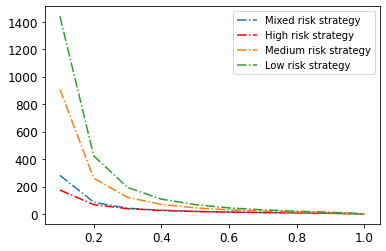

In [ ]:
fig, ax = plt.subplots()
G_z= 9
l = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 1]
plt.plot(l, final_df[final_df['G_z']== G_z]['round'], label ='Mixed risk strategy', linestyle='-.')
plt.plot(l, high_df[high_df['G_z']== G_z]['round'], color='red',label ='High risk strategy',linestyle='-.')
plt.plot(l, medium_df[medium_df['G_z']== G_z]['round'], label ='Medium risk strategy',linestyle='-.')
plt.plot(l, low_df[low_df['G_z']== G_z]['round'], label ='Low risk strategy',linestyle='-.')
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)

# Display the plots
plt.show()

Figure 26: . The combination of the Pz,G and Dz,G. Page 49

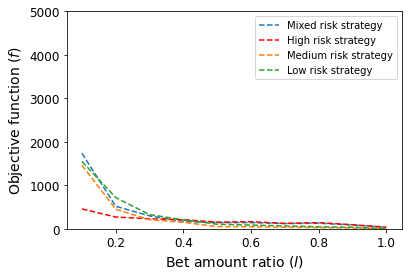

In [ ]:
fig, ax = plt.subplots()
G_z= 1
l = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 1]
plt.plot(l, final_df[final_df['G_z']== G_z]['f_1'], label ='Mixed risk strategy', linestyle='--')
plt.plot(l, high_df[high_df['G_z']== G_z]['f_1'], color='red',label ='High risk strategy',linestyle='--')
plt.plot(l, medium_df[medium_df['G_z']== G_z]['f_1'], label ='Medium risk strategy',linestyle='--')
plt.plot(l, low_df[low_df['G_z']== G_z]['f_1'], label ='Low risk strategy',linestyle='--')
# Set labels and title

ax.set_xlabel("Bet amount ratio $(l)$", fontsize=14)
ax.set_ylabel("Objective function $(f)$",fontsize=14)
#plt.title(f'Target $G = 2S_{0}$')
ax.set_ylim(0,5000)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)

# Display the plots
plt.show()

Figure 27: Risk adaptable strategy comparison. Page 50

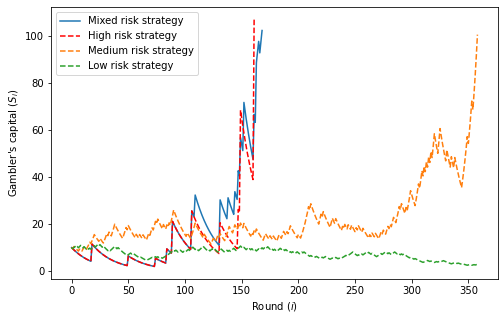

In [ ]:
l = 0.05
bet_type = 'nine'
S_i=[10]
S_high=[10]
S_medium=[10]
S_low=[10]
bet_amount = l*S_i[-1]
bet_amount_1 = l*S_low[-1]
bet_amount_2 = l*S_medium[-1]
bet_amount_3 = l*S_high[-1]
target = 100
ruin = 0

flag = 0
flag_1 = 0
flag_2 = 0
flag_3 = 0
flag_4 = 0
k = 0
loss = 0
        
while flag != 4:
    random = np.random.randint(0, 37) 
    if random in dic[bet_type]['values']:
        S_i.append(S_i[-1]+ bet_amount*dic[bet_type]['payoff'])
        bet_amount = l*S_i[-1]
    else:
        S_i.append(S_i[-1]-bet_amount)
        bet_amount = l*S_i[-1]
        
    if random in dic['nine']['values']:
        S_high.append(S_high[-1]+ bet_amount_3*35)
        bet_amount_3 = l*S_high[-1]
    else:
        S_high.append(S_high[-1]-bet_amount_3)
        bet_amount_3 = l*S_high[-1]
        
    if random in dic['dozen_1']['values']:
        S_medium.append(S_medium[-1]+ bet_amount_2*2)
        bet_amount_2 = l*S_medium[-1]
    else:
        S_medium.append(S_medium[-1]-bet_amount_2)
        bet_amount_2 = l*S_medium[-1]
        
    if random in dic['red']['values']:
        S_low.append(S_low[-1]+ bet_amount_1)
        bet_amount_1 = l*S_low[-1]
    else:
        S_low.append(S_low[-1]-bet_amount_1)
        bet_amount_1 = l*S_low[-1]
        
    
    if target*0.7 > S_i[-1] > target*0.2:
        bet_type = 'square'
    elif target*0.7 <= S_i[-1]:
        bet_type = 'red'
    else:
         bet_type = 'nine'
    
    if S_i[-1] >= target or S_i[-1] < 0.01:
        flag_1 = 1
    if S_high[-1] >= target or S_high[-1] < 0.01:
        flag_2 = 1
    if S_medium[-1] >= target or S_medium[-1] < 0.01:
        flag_3 = 1
    if S_low[-1] >= target or S_low[-1] < 0.01:
        flag_4 = 1
    flag = flag_4 + flag_3 + flag_2 + flag_1
    
rounds = np.arange(0, len(S_i)) 

fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(rounds[0:169], S_i[0:169], label ='Mixed risk strategy')
plt.plot(rounds[0:162], S_high[0:162], color= 'red', label ='High risk strategy', linestyle='--')

plt.plot(rounds[0:359], S_medium[0:359], label ='Medium risk strategy',linestyle='--')
plt.plot(rounds[0:359], S_low[0:359], label ='Low risk strategy',linestyle='--')

ax.set_xlabel("Round $(i)$")
ax.set_ylabel("Gambler's capital $(S_{i})$")
#ax.set_ylim(0,1200)
plt.legend()
plt.show()